In [78]:
import xgboost as xg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from xgboost import XGBClassifier
import seaborn as sns

In [49]:
df=pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [50]:
df=df[(df!='?').all(axis=1)]
df['income']=df['income'].map({'<=50K':0,'>50K':1})

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


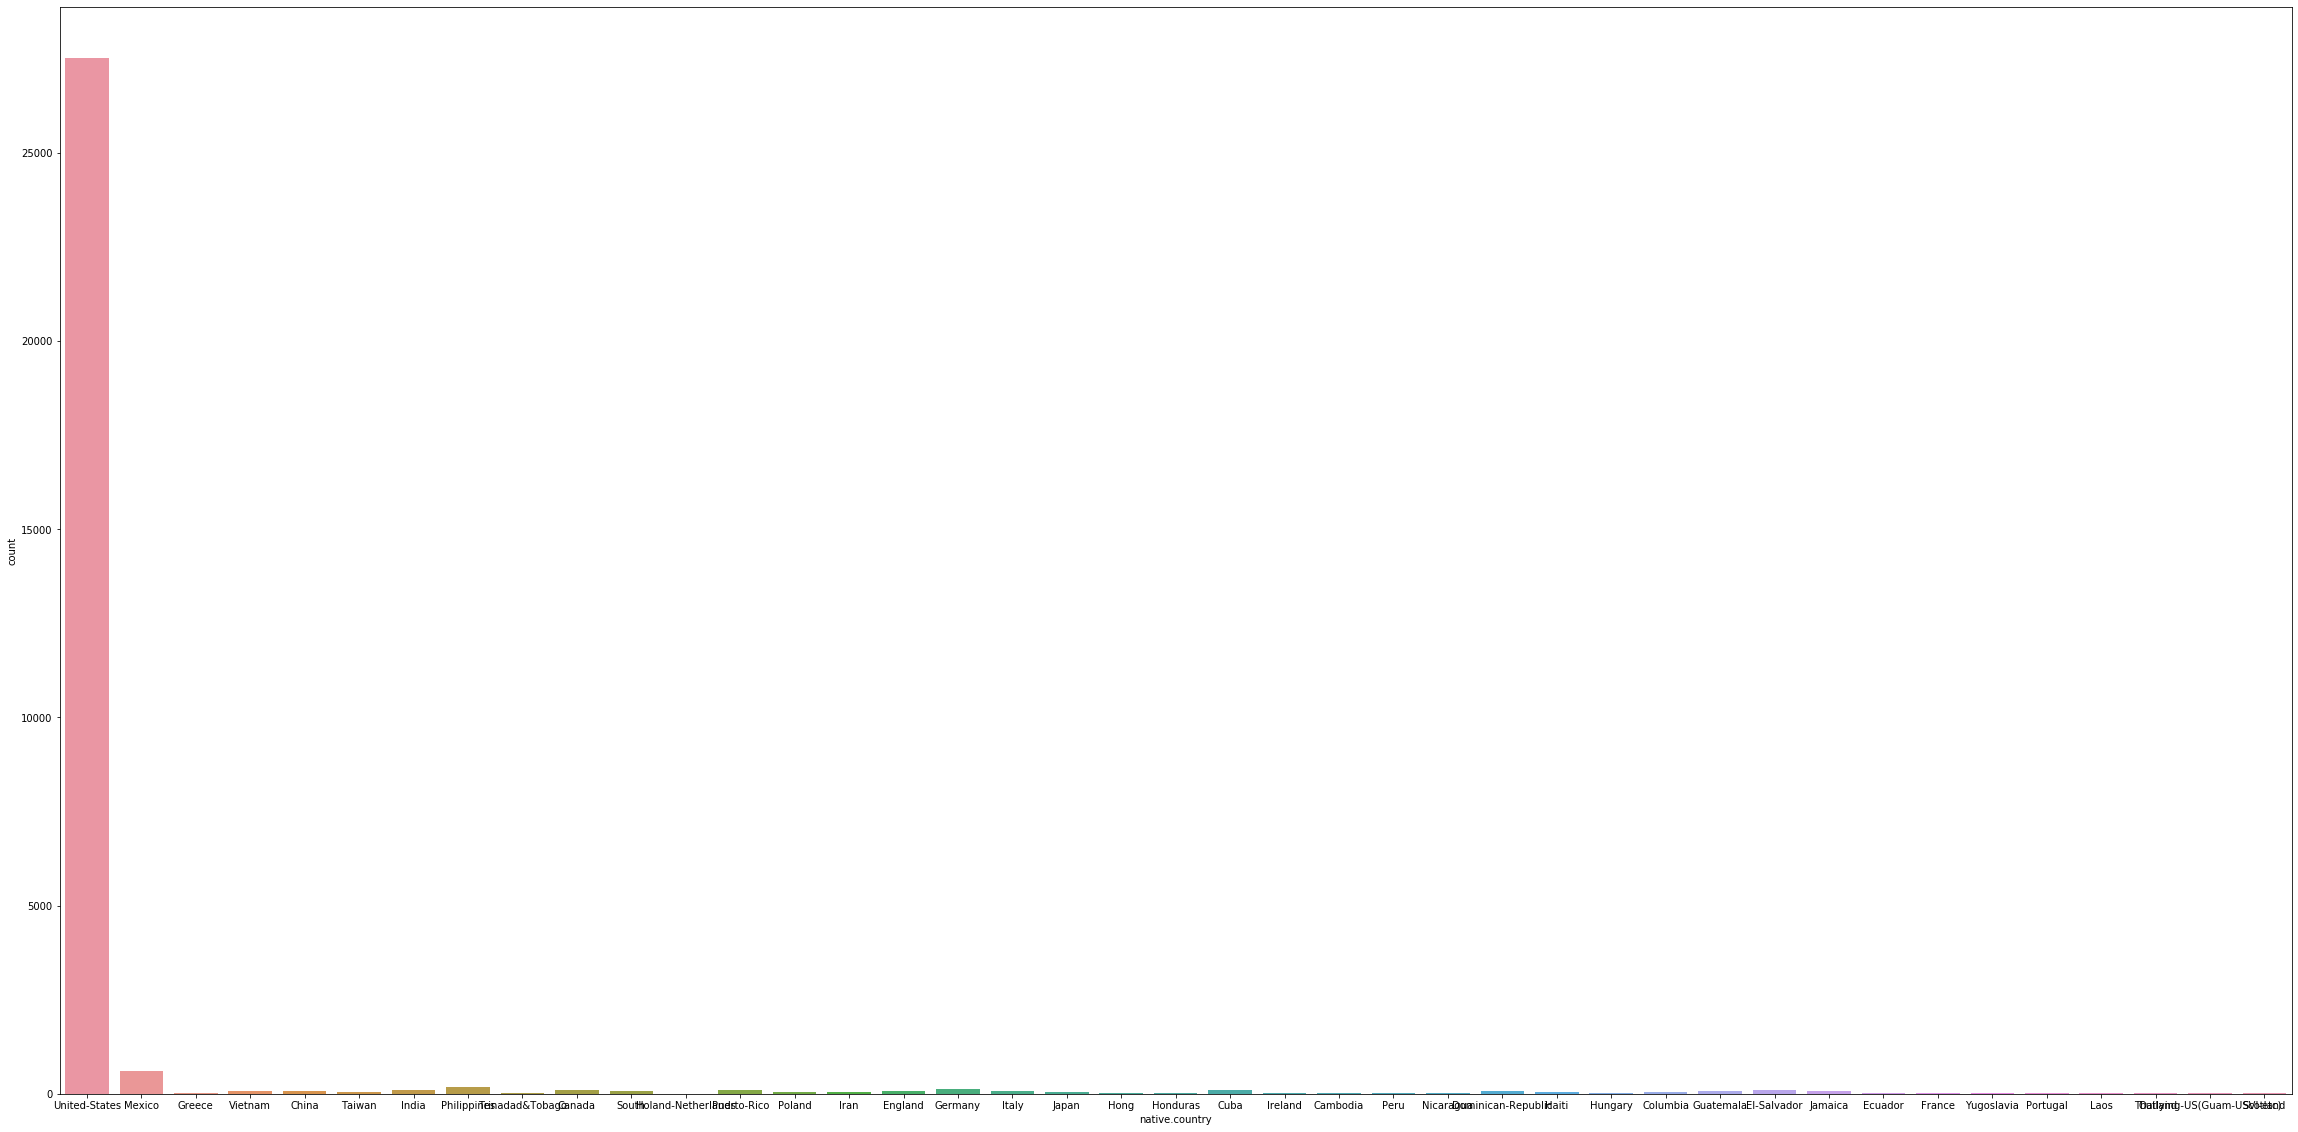

In [55]:
plt.figure(figsize=(40,20))
sns.countplot(x='native.country',data=df)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


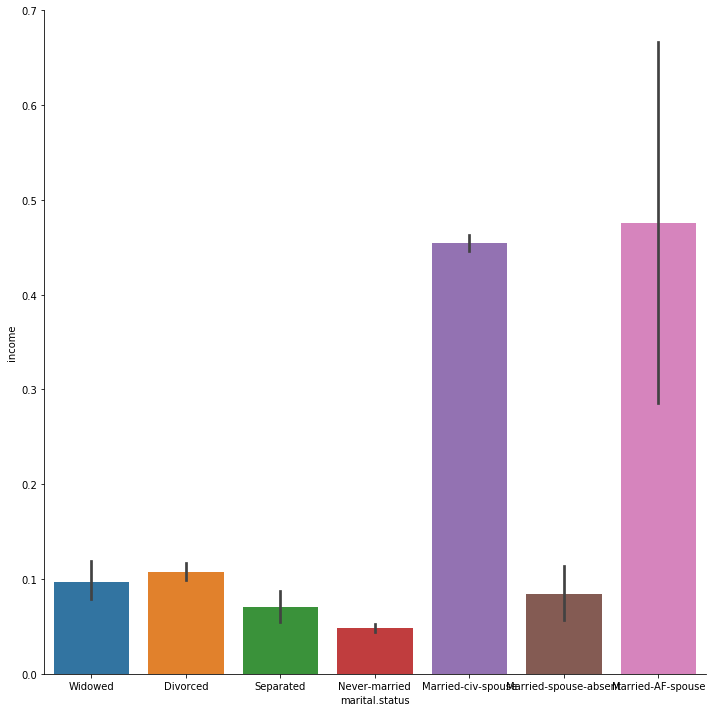

In [56]:
sns.factorplot(x='marital.status',y='income',data=df,kind='bar',height=10)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


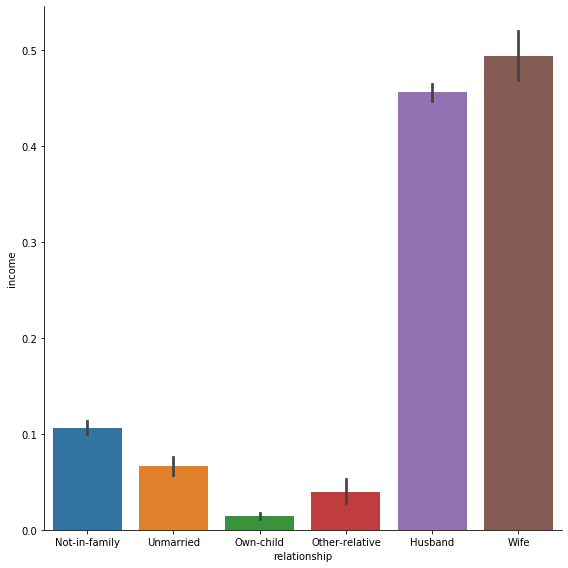

In [57]:
sns.factorplot(x='relationship',y='income',data=df,kind='bar',size=8)
plt.show()

In [58]:
df['marital.status']=df['marital.status'].map({'Married-civ-spouse':'Married', 'Divorced':'Single', 'Never-married':'Single', 'Separated':'Single', 
'Widowed':'Single', 'Married-spouse-absent':'Married', 'Married-AF-spouse':'Married'})

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
le=LabelEncoder()
for col in df:
    if df.dtypes[col]==np.object:
        df[col]=le.fit_transform(df[col])

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


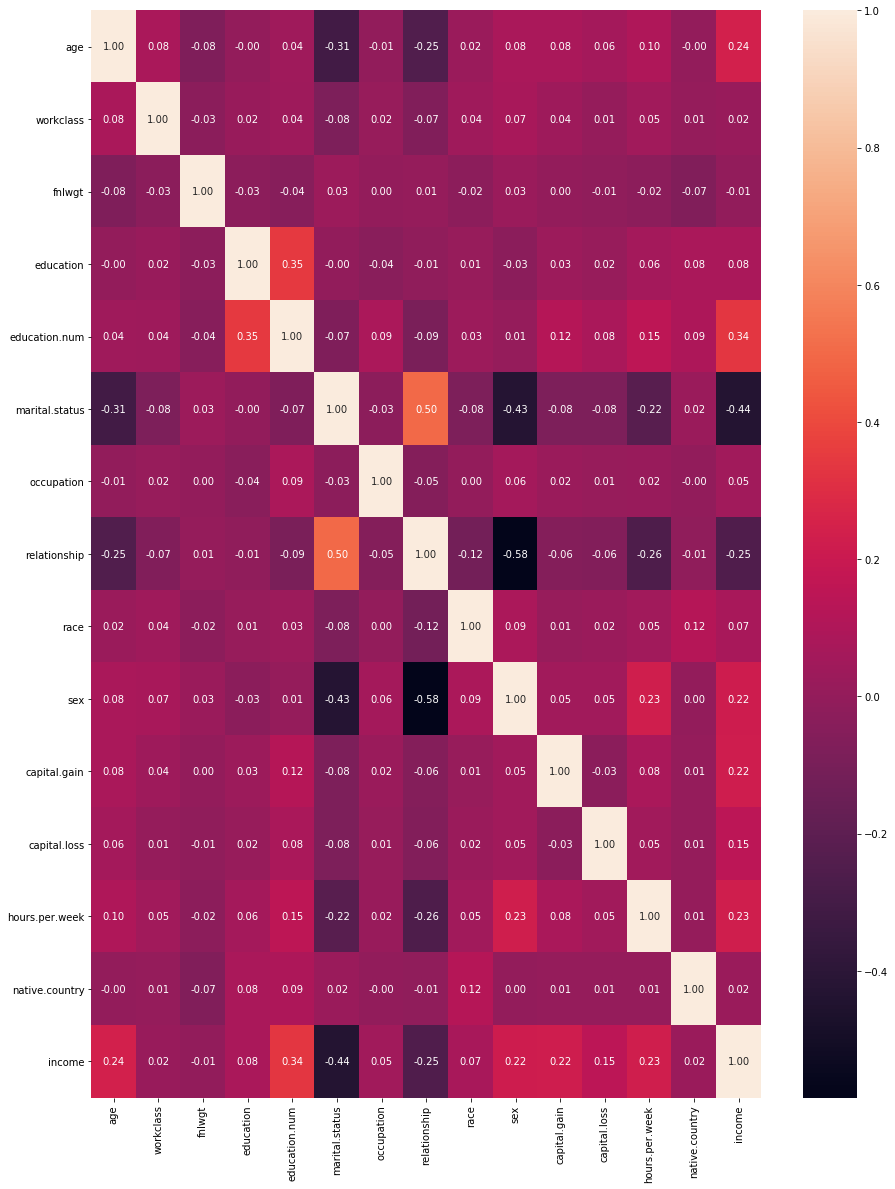

In [65]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

In [66]:
df=df.drop(['relationship','education'],axis=1)

In [67]:
df=df.drop(['occupation','fnlwgt','native.country'],axis=1)

In [68]:
df.head()

,age,workclass,education.num,marital.status,race,sex,capital.gain,capital.loss,hours.per.week,income
1,82,2,9,1,4,0,0,4356,18,0
3,54,2,4,1,4,0,0,3900,40,0
4,41,2,10,1,4,0,0,3900,40,0
5,34,2,9,1,4,0,0,3770,45,0
6,38,2,6,1,4,1,0,3770,40,0


In [74]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [76]:
model=XGBClassifier(objective='binary:logistic')
model.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:15:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [81]:
y_pred=model.predict(x_test)
predictions=[round(value) for value in y_pred]
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8603576451677718

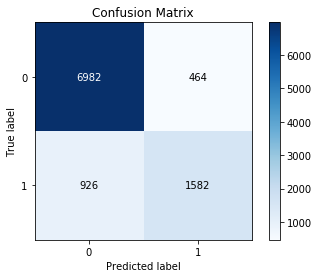

In [83]:
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(y_test,predictions)

In [ ]:
params={
       ' learning_rate':[0.1,0.001],
    'max_depth': [10,20],
    'n_estimators':[100,200],
     'min_child_weight' : [ 5, 7 ],
     'gamma': [ 0.2, 0.4 ],
     'colsample_bytree': [0.5 , 0.7 ]
}

In [ ]:
grid=GridSearchCV(model,params,verbose=3)

In [110]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV]  learning_rate=0.1, colsample_bytree=0.5, gamma=0.2, max_depth=10, min_child_weight=5, n_estimators=100 
[20:57:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:57:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]   learning_rate=0.1, colsample_bytree=0.5, gamma=0.2, max_depth=10, min_child_weight=5, n_estimators=100, score=0.859, total=   0.9s
[CV]  learning_rate=0.1, colsample_bytree=0.5, gamma=0.2, max_depth=10, min_child_weight=5, n_estimators=100 
[20:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]   learning_rate=0.1, colsample_bytree=0.5, gamma=0.2, max_depth=10, min_child_weight=5, n_estimators=100, score=0.860, total=   1.0s
[CV]  learning_rate=0.1, colsample_bytree=0.5, gamma=0.2, max_depth=10, min_child_weight=5, n_estimators=100 
[20:57:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:57:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV]   learning_rate=0.1, colsample_bytree=0.5, gamma=0.2, max_depth=10, min_child_weight=5, n_estimators=100, score=0.852, total=   1.0s
[CV]  learning_rate=0.1, colsample_bytree=0.5, gamma=0.2, max_depth=10, min_child_weight=5, n_estimators=100 
[20:57:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:57:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.5, ga

[CV]   learning_rate=0.1, colsample_bytree=0.5, gamma=0.2, max_depth=10, min_child_weight=7, n_estimators=100, score=0.860, total=   0.9s
[CV]  learning_rate=0.1, colsample_bytree=0.5, gamma=0.2, max_depth=10, min_child_weight=7, n_estimators=100 
[20:57:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:57:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.5, ga

[CV]   learning_rate=0.1, colsample_bytree=0.5, gamma=0.2, max_depth=20, min_child_weight=5, n_estimators=100, score=0.854, total=   1.4s
[CV]  learning_rate=0.1, colsample_bytree=0.5, gamma=0.2, max_depth=20, min_child_weight=5, n_estimators=100 
[20:57:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:57:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.5, ga

[CV]   learning_rate=0.1, colsample_bytree=0.5, gamma=0.2, max_depth=20, min_child_weight=5, n_estimators=200, score=0.844, total=   3.0s
[CV]  learning_rate=0.1, colsample_bytree=0.5, gamma=0.2, max_depth=20, min_child_weight=7, n_estimators=100 
[20:58:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:58:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.5, ga

[CV]   learning_rate=0.1, colsample_bytree=0.5, gamma=0.2, max_depth=20, min_child_weight=7, n_estimators=200, score=0.854, total=   2.6s
[CV]  learning_rate=0.1, colsample_bytree=0.5, gamma=0.2, max_depth=20, min_child_weight=7, n_estimators=200 
[20:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.5, ga

[CV]   learning_rate=0.1, colsample_bytree=0.5, gamma=0.3, max_depth=10, min_child_weight=5, n_estimators=200, score=0.853, total=   1.7s
[CV]  learning_rate=0.1, colsample_bytree=0.5, gamma=0.3, max_depth=10, min_child_weight=5, n_estimators=200 
[20:58:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:58:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.5, ga

[CV]   learning_rate=0.1, colsample_bytree=0.5, gamma=0.3, max_depth=10, min_child_weight=7, n_estimators=200, score=0.856, total=   1.7s
[CV]  learning_rate=0.1, colsample_bytree=0.5, gamma=0.3, max_depth=10, min_child_weight=7, n_estimators=200 
[20:58:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:58:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.5, ga

[CV]   learning_rate=0.1, colsample_bytree=0.5, gamma=0.3, max_depth=20, min_child_weight=5, n_estimators=200, score=0.847, total=   2.9s
[CV]  learning_rate=0.1, colsample_bytree=0.5, gamma=0.3, max_depth=20, min_child_weight=5, n_estimators=200 
[20:59:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:59:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.5, ga

[CV]   learning_rate=0.1, colsample_bytree=0.5, gamma=0.3, max_depth=20, min_child_weight=7, n_estimators=100, score=0.851, total=   1.5s
[CV]  learning_rate=0.1, colsample_bytree=0.5, gamma=0.3, max_depth=20, min_child_weight=7, n_estimators=200 
[20:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.5, ga

[CV]   learning_rate=0.1, colsample_bytree=0.5, gamma=0.4, max_depth=10, min_child_weight=5, n_estimators=100, score=0.856, total=   1.5s
[CV]  learning_rate=0.1, colsample_bytree=0.5, gamma=0.4, max_depth=10, min_child_weight=5, n_estimators=100 
[20:59:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:59:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.5, ga

[CV]   learning_rate=0.1, colsample_bytree=0.5, gamma=0.4, max_depth=10, min_child_weight=7, n_estimators=100, score=0.851, total=   0.9s
[CV]  learning_rate=0.1, colsample_bytree=0.5, gamma=0.4, max_depth=10, min_child_weight=7, n_estimators=100 
[21:00:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:00:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.5, ga

[CV]   learning_rate=0.1, colsample_bytree=0.5, gamma=0.4, max_depth=20, min_child_weight=5, n_estimators=100, score=0.851, total=   1.4s
[CV]  learning_rate=0.1, colsample_bytree=0.5, gamma=0.4, max_depth=20, min_child_weight=5, n_estimators=100 
[21:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.5, ga

[CV]   learning_rate=0.1, colsample_bytree=0.5, gamma=0.4, max_depth=20, min_child_weight=7, n_estimators=100, score=0.857, total=   1.4s
[CV]  learning_rate=0.1, colsample_bytree=0.5, gamma=0.4, max_depth=20, min_child_weight=7, n_estimators=100 
[21:00:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:00:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.5, ga

[CV]   learning_rate=0.1, colsample_bytree=0.5, gamma=0.4, max_depth=20, min_child_weight=7, n_estimators=200, score=0.851, total=   2.6s
[CV]  learning_rate=0.1, colsample_bytree=0.7, gamma=0.2, max_depth=10, min_child_weight=5, n_estimators=100 
[21:00:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:00:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.7, ga

[CV]   learning_rate=0.1, colsample_bytree=0.7, gamma=0.2, max_depth=10, min_child_weight=5, n_estimators=200, score=0.857, total=   2.2s
[CV]  learning_rate=0.1, colsample_bytree=0.7, gamma=0.2, max_depth=10, min_child_weight=5, n_estimators=200 
[21:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.7, ga

[CV]   learning_rate=0.1, colsample_bytree=0.7, gamma=0.2, max_depth=10, min_child_weight=7, n_estimators=200, score=0.850, total=   2.2s
[CV]  learning_rate=0.1, colsample_bytree=0.7, gamma=0.2, max_depth=10, min_child_weight=7, n_estimators=200 
[21:01:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:01:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.7, ga

[CV]   learning_rate=0.1, colsample_bytree=0.7, gamma=0.2, max_depth=20, min_child_weight=5, n_estimators=200, score=0.849, total=   4.1s
[CV]  learning_rate=0.1, colsample_bytree=0.7, gamma=0.2, max_depth=20, min_child_weight=5, n_estimators=200 
[21:01:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:01:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.7, ga

[CV]   learning_rate=0.1, colsample_bytree=0.7, gamma=0.2, max_depth=20, min_child_weight=7, n_estimators=200, score=0.846, total=   4.4s
[CV]  learning_rate=0.1, colsample_bytree=0.7, gamma=0.2, max_depth=20, min_child_weight=7, n_estimators=200 
[21:02:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:02:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.7, ga

[CV]   learning_rate=0.1, colsample_bytree=0.7, gamma=0.3, max_depth=10, min_child_weight=5, n_estimators=100, score=0.858, total=   1.2s
[CV]  learning_rate=0.1, colsample_bytree=0.7, gamma=0.3, max_depth=10, min_child_weight=5, n_estimators=200 
[21:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.7, ga

[CV]   learning_rate=0.1, colsample_bytree=0.7, gamma=0.3, max_depth=10, min_child_weight=7, n_estimators=100, score=0.859, total=   1.1s
[CV]  learning_rate=0.1, colsample_bytree=0.7, gamma=0.3, max_depth=10, min_child_weight=7, n_estimators=100 
[21:02:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:02:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.7, ga

[CV]   learning_rate=0.1, colsample_bytree=0.7, gamma=0.3, max_depth=20, min_child_weight=5, n_estimators=100, score=0.846, total=   2.1s
[CV]  learning_rate=0.1, colsample_bytree=0.7, gamma=0.3, max_depth=20, min_child_weight=5, n_estimators=100 
[21:03:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:03:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.7, ga

[CV]   learning_rate=0.1, colsample_bytree=0.7, gamma=0.3, max_depth=20, min_child_weight=7, n_estimators=100, score=0.853, total=   2.1s
[CV]  learning_rate=0.1, colsample_bytree=0.7, gamma=0.3, max_depth=20, min_child_weight=7, n_estimators=100 
[21:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.7, ga

[CV]   learning_rate=0.1, colsample_bytree=0.7, gamma=0.4, max_depth=10, min_child_weight=5, n_estimators=100, score=0.859, total=   1.2s
[CV]  learning_rate=0.1, colsample_bytree=0.7, gamma=0.4, max_depth=10, min_child_weight=5, n_estimators=100 
[21:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.7, ga

[CV]   learning_rate=0.1, colsample_bytree=0.7, gamma=0.4, max_depth=10, min_child_weight=5, n_estimators=200, score=0.858, total=   2.2s
[CV]  learning_rate=0.1, colsample_bytree=0.7, gamma=0.4, max_depth=10, min_child_weight=7, n_estimators=100 
[21:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.7, ga

[CV]   learning_rate=0.1, colsample_bytree=0.7, gamma=0.4, max_depth=10, min_child_weight=7, n_estimators=200, score=0.858, total=   2.3s
[CV]  learning_rate=0.1, colsample_bytree=0.7, gamma=0.4, max_depth=10, min_child_weight=7, n_estimators=200 
[21:04:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:04:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.7, ga

[CV]   learning_rate=0.1, colsample_bytree=0.7, gamma=0.4, max_depth=20, min_child_weight=5, n_estimators=200, score=0.843, total=   4.2s
[CV]  learning_rate=0.1, colsample_bytree=0.7, gamma=0.4, max_depth=20, min_child_weight=5, n_estimators=200 
[21:05:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:05:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.7, ga

[CV]   learning_rate=0.1, colsample_bytree=0.7, gamma=0.4, max_depth=20, min_child_weight=7, n_estimators=200, score=0.851, total=   4.0s
[CV]  learning_rate=0.1, colsample_bytree=0.7, gamma=0.4, max_depth=20, min_child_weight=7, n_estimators=200 
[21:05:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:05:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, colsample_bytree=0.7, ga

[CV]   learning_rate=0.01, colsample_bytree=0.5, gamma=0.2, max_depth=10, min_child_weight=5, n_estimators=200, score=0.853, total=   1.7s
[CV]  learning_rate=0.01, colsample_bytree=0.5, gamma=0.2, max_depth=10, min_child_weight=5, n_estimators=200 
[21:05:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:05:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, colsample_bytree=0.5,

[CV]   learning_rate=0.01, colsample_bytree=0.5, gamma=0.2, max_depth=10, min_child_weight=7, n_estimators=100, score=0.856, total=   0.9s
[CV]  learning_rate=0.01, colsample_bytree=0.5, gamma=0.2, max_depth=10, min_child_weight=7, n_estimators=200 
[21:06:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:06:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, colsample_bytree=0.5,

[CV]   learning_rate=0.01, colsample_bytree=0.5, gamma=0.2, max_depth=20, min_child_weight=5, n_estimators=100, score=0.855, total=   1.6s
[CV]  learning_rate=0.01, colsample_bytree=0.5, gamma=0.2, max_depth=20, min_child_weight=5, n_estimators=100 
[21:06:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:06:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, colsample_bytree=0.5,

[CV]   learning_rate=0.01, colsample_bytree=0.5, gamma=0.2, max_depth=20, min_child_weight=7, n_estimators=100, score=0.846, total=   1.4s
[CV]  learning_rate=0.01, colsample_bytree=0.5, gamma=0.2, max_depth=20, min_child_weight=7, n_estimators=100 
[21:06:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:06:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, colsample_bytree=0.5,

[CV]   learning_rate=0.01, colsample_bytree=0.5, gamma=0.3, max_depth=10, min_child_weight=5, n_estimators=100, score=0.857, total=   0.9s
[CV]  learning_rate=0.01, colsample_bytree=0.5, gamma=0.3, max_depth=10, min_child_weight=5, n_estimators=100 
[21:06:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:06:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, colsample_bytree=0.5,

[CV]   learning_rate=0.01, colsample_bytree=0.5, gamma=0.3, max_depth=10, min_child_weight=7, n_estimators=100, score=0.857, total=   0.9s
[CV]  learning_rate=0.01, colsample_bytree=0.5, gamma=0.3, max_depth=10, min_child_weight=7, n_estimators=100 
[21:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, colsample_bytree=0.5,

[CV]   learning_rate=0.01, colsample_bytree=0.5, gamma=0.3, max_depth=10, min_child_weight=7, n_estimators=200, score=0.851, total=   1.7s
[CV]  learning_rate=0.01, colsample_bytree=0.5, gamma=0.3, max_depth=20, min_child_weight=5, n_estimators=100 
[21:07:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:07:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, colsample_bytree=0.5,

[CV]   learning_rate=0.01, colsample_bytree=0.5, gamma=0.3, max_depth=20, min_child_weight=5, n_estimators=200, score=0.854, total=   2.7s
[CV]  learning_rate=0.01, colsample_bytree=0.5, gamma=0.3, max_depth=20, min_child_weight=5, n_estimators=200 
[21:07:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:07:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, colsample_bytree=0.5,

[CV]   learning_rate=0.01, colsample_bytree=0.5, gamma=0.3, max_depth=20, min_child_weight=7, n_estimators=200, score=0.843, total=   2.6s
[CV]  learning_rate=0.01, colsample_bytree=0.5, gamma=0.3, max_depth=20, min_child_weight=7, n_estimators=200 
[21:07:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:07:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, colsample_bytree=0.5,

[CV]   learning_rate=0.01, colsample_bytree=0.5, gamma=0.4, max_depth=10, min_child_weight=5, n_estimators=200, score=0.854, total=   1.6s
[CV]  learning_rate=0.01, colsample_bytree=0.5, gamma=0.4, max_depth=10, min_child_weight=5, n_estimators=200 
[21:08:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:08:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, colsample_bytree=0.5,

[CV]   learning_rate=0.01, colsample_bytree=0.5, gamma=0.4, max_depth=10, min_child_weight=7, n_estimators=200, score=0.855, total=   1.7s
[CV]  learning_rate=0.01, colsample_bytree=0.5, gamma=0.4, max_depth=10, min_child_weight=7, n_estimators=200 
[21:08:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:08:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, colsample_bytree=0.5,

[CV]   learning_rate=0.01, colsample_bytree=0.5, gamma=0.4, max_depth=20, min_child_weight=5, n_estimators=100, score=0.849, total=   1.4s
[CV]  learning_rate=0.01, colsample_bytree=0.5, gamma=0.4, max_depth=20, min_child_weight=5, n_estimators=200 
[21:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, colsample_bytree=0.5,

[CV]   learning_rate=0.01, colsample_bytree=0.5, gamma=0.4, max_depth=20, min_child_weight=7, n_estimators=100, score=0.853, total=   1.4s
[CV]  learning_rate=0.01, colsample_bytree=0.5, gamma=0.4, max_depth=20, min_child_weight=7, n_estimators=100 
[21:08:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:08:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, colsample_bytree=0.5,

[CV]   learning_rate=0.01, colsample_bytree=0.7, gamma=0.2, max_depth=10, min_child_weight=5, n_estimators=100, score=0.852, total=   1.2s
[CV]  learning_rate=0.01, colsample_bytree=0.7, gamma=0.2, max_depth=10, min_child_weight=5, n_estimators=100 
[21:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, colsample_bytree=0.7,

[CV]   learning_rate=0.01, colsample_bytree=0.7, gamma=0.2, max_depth=10, min_child_weight=7, n_estimators=100, score=0.860, total=   1.2s
[CV]  learning_rate=0.01, colsample_bytree=0.7, gamma=0.2, max_depth=10, min_child_weight=7, n_estimators=100 
[21:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, colsample_bytree=0.7,

[CV]   learning_rate=0.01, colsample_bytree=0.7, gamma=0.2, max_depth=20, min_child_weight=5, n_estimators=100, score=0.848, total=   2.1s
[CV]  learning_rate=0.01, colsample_bytree=0.7, gamma=0.2, max_depth=20, min_child_weight=5, n_estimators=100 
[21:09:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:09:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, colsample_bytree=0.7,

[CV]   learning_rate=0.01, colsample_bytree=0.7, gamma=0.2, max_depth=20, min_child_weight=5, n_estimators=200, score=0.845, total=   4.6s
[CV]  learning_rate=0.01, colsample_bytree=0.7, gamma=0.2, max_depth=20, min_child_weight=7, n_estimators=100 
[21:10:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, colsample_bytree=0.7,

[CV]   learning_rate=0.01, colsample_bytree=0.7, gamma=0.2, max_depth=20, min_child_weight=7, n_estimators=200, score=0.851, total=   4.3s
[CV]  learning_rate=0.01, colsample_bytree=0.7, gamma=0.2, max_depth=20, min_child_weight=7, n_estimators=200 
[21:10:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:10:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, colsample_bytree=0.7,

[CV]   learning_rate=0.01, colsample_bytree=0.7, gamma=0.3, max_depth=10, min_child_weight=5, n_estimators=200, score=0.851, total=   2.2s
[CV]  learning_rate=0.01, colsample_bytree=0.7, gamma=0.3, max_depth=10, min_child_weight=5, n_estimators=200 
[21:11:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:11:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, colsample_bytree=0.7,

[CV]   learning_rate=0.01, colsample_bytree=0.7, gamma=0.3, max_depth=10, min_child_weight=7, n_estimators=200, score=0.855, total=   2.3s
[CV]  learning_rate=0.01, colsample_bytree=0.7, gamma=0.3, max_depth=10, min_child_weight=7, n_estimators=200 
[21:11:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:11:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, colsample_bytree=0.7,

KeyboardInterrupt: 

In [ ]:
grid.best_params_

In [ ]:
new_model=XGBClassifier(learning_rate= 1, max_depth= 5, n_estimators= 50)
new_model.fit(x_train, y_train)

In [96]:
y_pred_new = new_model.predict(x_test)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(y_test,predictions_new)
accuracy_new

0.8558368495077355